<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Breast_Cancer_Wisconsin_(profiling2)_iynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BreastCancer.csv"
df = pd.read_csv(url)

# Step 3: Preview the Data
print("=== First 5 Rows ===")
print(df.head())

print("\n=== Dataset Info ===")
print(df.info())

print("\n=== Summary Statistics ===")
print(df.describe())

print("\n=== Missing Values ===")
print(df.isnull().sum())

print("\n=== Duplicate Rows ===")
print(df.duplicated().sum())


=== First 5 Rows ===
        Id  Cl.thickness  Cell.size  Cell.shape  Marg.adhesion  Epith.c.size  \
0  1000025             5          1           1              1             2   
1  1002945             5          4           4              5             7   
2  1015425             3          1           1              1             2   
3  1016277             6          8           8              1             3   
4  1017023             4          1           1              3             2   

   Bare.nuclei  Bl.cromatin  Normal.nucleoli  Mitoses  Class  
0          1.0            3                1        1      0  
1         10.0            3                2        1      0  
2          2.0            3                1        1      0  
3          4.0            3                7        1      0  
4          1.0            3                1        1      0  

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 col

In [4]:
if 'diagnosis' in df.columns:
    print("\n=== Class Distribution ===")
    print(df['diagnosis'].value_counts())

    sns.countplot(x='diagnosis', data=df)
    plt.title('Class Distribution: Diagnosis (B = Benign, M = Malignant)')
    plt.show()


=== Correlation Matrix ===


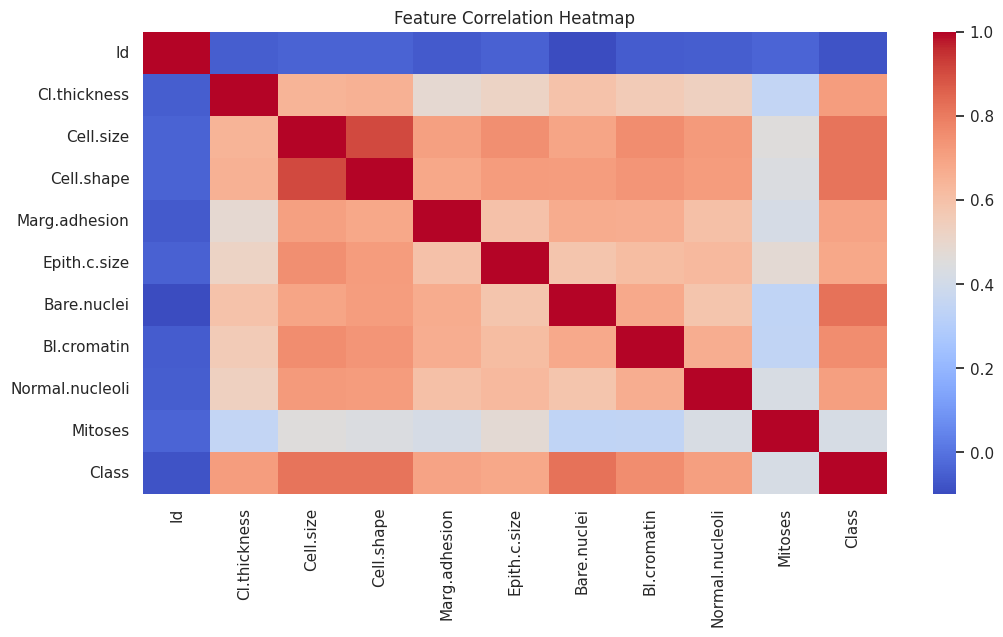

In [5]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

print("\n=== Correlation Matrix ===")
correlation = numeric_cols.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [6]:
if 'diagnosis' in df.columns:
    # Map diagnosis to numeric
    df['diagnosis_numeric'] = df['diagnosis'].map({'M': 1, 'B': 0})
    corr_with_diag = correlation['diagnosis_numeric'].abs().sort_values(ascending=False)
    top_features = corr_with_diag[1:7].index.tolist()  # skip 'diagnosis_numeric' itself

    # Plot distributions
    for feature in top_features:
        sns.histplot(data=df, x=feature, hue='diagnosis', bins=30, kde=True, palette='husl')
        plt.title(f'Distribution of {feature} by Diagnosis')
        plt.show()

In [9]:
df.to_csv("breast_cancer_profiled.csv", index=False)